<a href="https://colab.research.google.com/github/raohxxx/Telecom-2-challenge/blob/main/telecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

1.  **Introducción**
    *   Justificación
    *   Objetivos

2.  **Importando los datos de Telecom x**
    *   Extraccion de datos.
    *   Revisar si hay datos Nulos

3.  **Preparación de los Datos**
    *   Eliminacion columnas no relevantes
    *   transformacion de columnas categoricas y cambios de valores
    *   Data Frame limpio, se eliminaron varias columnas con la unificacion del no internet service a No
    *   Obtencion columnas dummies

4.  **Correlación y Selección de Variables**
    *   Hacer matriz de correlacion
    *   Aplicando Filtro a mapa de calor para mejor visualizacion
    *   Valores de correlacion de acuerdo a la columna 'CHURN_SI'
    *   Columnas con una correlacion menor al 0.05 que seran eliminadas porque su aporte no es importante

5.  **Verificación de la Proporción de Cancelación (Churn)**
    *   Proporcion de Churn
    *   Box Plot de algunas de las variables mas infuyentes contra el churn
    *   Basado en los diagramas de caja:

6.  **Generacion de los Datos a Analizar**

7.  **Analisis de VIF para detectar multicolianialidad**
    *   Se observan unos altos valores que nos señalan colinialidad entre columnas, por lo que se eliminara la columna cargoTotal ya que esa se puede derivar de la antiguedad y el cargo mensual
    *   Se corrigio la colinialidad al remover columnas con alta correlacion entre si

8.  **Separacion de datos**

9.  **Normalizar datos para poder usar en modelos que requieran datos normalizados**
    *   se usa el nombre de xtrain_norma, xtest_norma para valores normalizados

10. **Balancear datos con smote y metodo Oversampling**
    *   X_train_bal, Y_train _bal
    *   Balanceo con Under sampling y nearmiss version 3
    *   Xtrain_under, Ytrain _under

11. **Creación de Modelos**
    *   Crear modelo Regresion Logistica
    *   Modelo de Regresion Logistica
    *   con datos balanceados con Smote
    *   Logistic Regression con datos balanceados con el metodo undermiss version 3.
    *   Modelo arbol de decision
    *   Modelo KNN
    *   Random Forest sin el parametro de max_depth
    *   Random Forest con el parametro de max_depth=3
    *   Modelo XGBoost

12. **Grafico comparacion ROC AUC Curve**
    *   Analisis Grafico ROC AUC

13. **Analisis y recomendaciones**

14. **Conclusión y Recomendación**
    *   Recomendaciones

<H1> Challenge Telecom X parte 2</H1>


# 📊 Introducción

En un mercado de telecomunicaciones cada vez más competitivo, **predecir la cancelación de clientes (Churn)** se ha convertido en una herramienta estratégica para mantener la rentabilidad y fortalecer la fidelidad de la cartera. La pérdida de un cliente no solo significa ingresos que desaparecen, sino también costos adicionales para reemplazarlo, muchas veces muy superiores al costo de retenerlo.

El presente proyecto forma parte de un desafío analítico para la empresa ficticia **Telecom X**, cuyo objetivo es identificar, a partir de datos históricos, qué clientes tienen mayor probabilidad de abandonar el servicio. Esta capacidad predictiva permitiría a la compañía **anticiparse a las bajas**, optimizar campañas de retención y dirigir esfuerzos comerciales hacia clientes con mayor riesgo, maximizando así el retorno de inversión en marketing y soporte.

Tras una etapa inicial de **análisis exploratorio de datos** que permitió comprender la estructura de la información y las principales tendencias, este trabajo se centra en la **creación de un pipeline de Machine Learning** capaz de:
- Preprocesar y limpiar los datos.
- Seleccionar las variables más relevantes para la predicción.
- Entrenar y comparar distintos algoritmos de clasificación.
- Evaluar su rendimiento mediante métricas especializadas.
- Interpretar los resultados para traducirlos en acciones concretas de negocio.

Se emplearon **herramientas y librerías clave del ecosistema Python** como *Pandas*, *NumPy*, *Scikit-learn*, *Matplotlib*, y opcionalmente *XGBoost* y *LightGBM*, además de *SHAP* para la interpretabilidad de modelos.

Los resultados obtenidos muestran que el **XGBoost** se posicionó como el mejor modelo en términos de AUC (0.82), seguido de cerca por el **Random Forest (max_depth=3)** (AUC = 0.81). Ambos modelos revelaron factores determinantes en la cancelación, como el tiempo como cliente, el tipo de contrato, el uso de servicios adicionales y la existencia de quejas previas. El Random Forest con `max_depth=3` tuvo el Recall más alto (0.75), siendo muy efectivo en la identificación de clientes propensos a abandonar.

Este estudio sienta las bases para la **implementación de un sistema predictivo en producción**, con potencial para integrarse en un dashboard interactivo que asista a los equipos comerciales en la toma de decisiones orientadas a la retención de clientes.

* * *

## 📌 Justificación

La retención de clientes es un factor clave para la sostenibilidad de cualquier empresa de servicios. En telecomunicaciones, donde la competencia es intensa y los costos de adquisición son elevados, **prevenir la fuga de clientes resulta más rentable que captar nuevos**. Un modelo de predicción de churn no solo identifica usuarios en riesgo, sino que permite **personalizar estrategias de retención**, optimizar recursos comerciales y mejorar la satisfacción del cliente mediante acciones proactivas.

Este proyecto, aunque basado en datos ficticios, representa un caso aplicable en entornos reales, sirviendo como referencia para la **implementación de soluciones analíticas en empresas de telecomunicaciones** u otros sectores con problemas de abandono de clientes.

* * *

## 🎯 Objetivos

**Objetivo general**\
Desarrollar un modelo de Machine Learning que permita predecir con alta precisión la probabilidad de cancelación de clientes en Telecom X, para facilitar la toma de decisiones estratégicas en retención.

**Objetivos específicos**
1. Analizar la distribución de datos y detectar posibles problemas como valores faltantes o desbalance de clases.
2. Preprocesar y preparar los datos mediante codificación, imputación y escalado de variables.
3. Entrenar y evaluar distintos modelos de clasificación, comparando su rendimiento con métricas como *Accuracy*, *Recall*, *F1-score* y *AUC*.
4. Identificar las variables con mayor impacto en la predicción del churn.
5. Proponer estrategias accionables basadas en los resultados del modelo.


##1.0- importando las bibliotecas usadas en este challenge

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# 1.1 -Importando los datos de Telecom x

## 1.1.0-  Extraccion de datos.
###     Los datos se colocaron previamente en un repositorio de GitHub

In [168]:

url='https://github.com/raohxxx/Telecom-2-challenge/raw/refs/heads/main/datos_limpios3.csv'
df=pd.read_csv(url)

df.head()


,IDcliente,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,Cuentas_Diarias
0,0002-ORFBO,No,Mujer,0,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Hombre,0,No,No,9,Si,Si,DSL,No,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Si,Hombre,0,No,No,4,Si,No,Fiber optic,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Si,Hombre,1,Si,No,13,Si,No,Fiber optic,No,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Si,Mujer,1,Si,No,3,Si,No,Fiber optic,No,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.80


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IDcliente                7043 non-null   object 
 1   CHURN                    7043 non-null   object 
 2   GENERO_CLIENTE           7043 non-null   object 
 3   ADULTO_MAYOR             7043 non-null   int64  
 4   CON_PAREJA               7043 non-null   object 
 5   CLIENTE_CON_DEPENDIENTE  7043 non-null   object 
 6   ANTIGUEDAD_CLIENTE       7043 non-null   int64  
 7   SERVICIO_TELEFONO        7043 non-null   object 
 8   MULTIPLES_LINEAS         7043 non-null   object 
 9   S_INTERNET               7043 non-null   object 
 10  SEGURIDAD_ONLINE         7043 non-null   object 
 11  RESPALDO_ONLINE          7043 non-null   object 
 12  PROTECCION_DISPOSITIVOS  7043 non-null   object 
 13  SOPORTE_TECNICO          7043 non-null   object 
 14  TV_STREAMING            

### 1.1.2 Revisar si hay datos Nulos

In [170]:
df.isna().sum()

,0
IDcliente,0
CHURN,0
GENERO_CLIENTE,0
ADULTO_MAYOR,0
CON_PAREJA,0
CLIENTE_CON_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
S_INTERNET,0


##2.0 🛠️ Preparación de los Datos
##2.1- ✔️ Eliminacion columnas no relevantes
### Se elimina IDcliente porque es una columna con informacion unica de cada cliente y que no aporta informacion a los modelos, tambies la de cuentas diarias porque fue creado dividiendo cargo mensual entre 30 por lo tanto esta correlacionada con cargo mensual

In [171]:
df=df.drop( columns=['IDcliente','Cuentas_Diarias'])
df.sample(10)

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
6544,No,Mujer,1,No,No,13,Si,No,Fiber optic,No,No,Si,No,Si,Si,Month-to-month,Si,Electronic check,96.85,1235.55
2876,No,Hombre,1,Si,Si,68,Si,Si,Fiber optic,No,Si,Si,No,No,No,Month-to-month,Si,Electronic check,84.65,5683.60
1931,No,Hombre,1,Si,No,52,Si,Si,Fiber optic,No,Si,Si,No,Si,Si,One year,Si,Bank transfer (automatic),105.10,5376.40
6110,Si,Hombre,0,No,No,4,No,No phone service,DSL,No,No,Si,No,No,No,Month-to-month,Si,Electronic check,29.65,118.50
2077,No,Hombre,0,Si,Si,72,Si,Si,Fiber optic,Si,Si,Si,Si,No,Si,Two year,Si,Credit card (automatic),104.90,7732.65
4721,No,Hombre,0,No,No,1,Si,No,DSL,No,No,No,No,No,No,Month-to-month,Si,Bank transfer (automatic),43.85,43.85
177,No,Hombre,0,Si,Si,27,Si,No,DSL,Si,Si,No,No,No,No,Month-to-month,Si,Credit card (automatic),54.75,1510.30
4010,No,Mujer,0,Si,No,41,Si,No,Fiber optic,No,Si,Si,Si,No,No,One year,Si,Bank transfer (automatic),86.20,3339.05
1881,No,Mujer,0,Si,Si,72,Si,Si,DSL,Si,No,Si,Si,Si,Si,Two year,Si,Bank transfer (automatic),84.20,5986.55
3209,No,Mujer,0,No,No,53,No,No phone service,DSL,Si,Si,Si,Si,Si,No,One year,Si,Electronic check,53.60,2879.20


##2.2-  transformacion de columnas categoricas y cambios de valores
### De los datos se observan  que donde dice no_internet_service el cliente no tiene el servicio por lo cual podemos remplazar esos valores por no , sin que afecte los datos, adicionalmente a la hora de codificar se elimnan la creacion de varias columnas

In [172]:
columnas_a_corregir=['SEGURIDAD_ONLINE',	'RESPALDO_ONLINE',	'PROTECCION_DISPOSITIVOS',	'SOPORTE_TECNICO',	'TV_STREAMING',	'PELICULAS_STREAMING'	]

df_clean = df.copy()
for col in columnas_a_corregir:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')
df_clean.sample(10)

,CHURN,GENERO_CLIENTE,ADULTO_MAYOR,CON_PAREJA,CLIENTE_CON_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,S_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,TV_STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
3123,No,Mujer,1,No,No,8,Si,No,Fiber optic,No,No,Si,No,No,No,Month-to-month,Si,Bank transfer (automatic),74.05,600.15
2443,Si,Mujer,1,No,No,15,Si,No,Fiber optic,Si,No,Si,Si,No,Si,Month-to-month,Si,Mailed check,96.30,1426.75
1077,No,Hombre,0,Si,Si,68,Si,Si,DSL,Si,Si,Si,Si,Si,Si,Two year,Si,Credit card (automatic),92.20,6392.85
111,No,Mujer,0,No,No,9,Si,Si,Fiber optic,No,No,No,No,No,No,Month-to-month,Si,Credit card (automatic),75.20,633.85
4311,No,Hombre,0,No,No,51,Si,Si,No,No,No,No,No,No,No,Two year,No,Mailed check,24.75,1234.60
6559,Si,Mujer,1,No,No,2,Si,No,Fiber optic,No,No,No,No,No,Si,Month-to-month,Si,Bank transfer (automatic),79.75,159.40
3799,No,Mujer,0,No,No,52,Si,Si,Fiber optic,No,Si,No,No,No,No,One year,Si,Mailed check,80.20,4297.60
4462,Si,Hombre,0,Si,Si,33,Si,No,DSL,No,No,Si,Si,Si,Si,One year,Si,Mailed check,73.90,2405.05
2959,No,Mujer,0,Si,Si,68,Si,Si,DSL,Si,Si,Si,No,Si,No,One year,Si,Credit card (automatic),73.00,5163.00
6446,No,Hombre,0,Si,No,44,Si,No,DSL,Si,Si,No,Si,No,No,One year,Si,Bank transfer (automatic),59.85,2603.95


##2.3-  Data Frame limpio, se eliminaron varias columnas con la unificacion del no internet service a No

In [173]:
df_clean.shape

(7043, 20)

In [174]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHURN                    7043 non-null   object 
 1   GENERO_CLIENTE           7043 non-null   object 
 2   ADULTO_MAYOR             7043 non-null   int64  
 3   CON_PAREJA               7043 non-null   object 
 4   CLIENTE_CON_DEPENDIENTE  7043 non-null   object 
 5   ANTIGUEDAD_CLIENTE       7043 non-null   int64  
 6   SERVICIO_TELEFONO        7043 non-null   object 
 7   MULTIPLES_LINEAS         7043 non-null   object 
 8   S_INTERNET               7043 non-null   object 
 9   SEGURIDAD_ONLINE         7043 non-null   object 
 10  RESPALDO_ONLINE          7043 non-null   object 
 11  PROTECCION_DISPOSITIVOS  7043 non-null   object 
 12  SOPORTE_TECNICO          7043 non-null   object 
 13  TV_STREAMING             7043 non-null   object 
 14  PELICULAS_STREAMING     

In [175]:
columnas_categoricas=df.select_dtypes(include='object').columns
columnas_categoricas

Index(['CHURN', 'GENERO_CLIENTE', 'CON_PAREJA', 'CLIENTE_CON_DEPENDIENTE',
       'SERVICIO_TELEFONO', 'MULTIPLES_LINEAS', 'S_INTERNET',
       'SEGURIDAD_ONLINE', 'RESPALDO_ONLINE', 'PROTECCION_DISPOSITIVOS',
       'SOPORTE_TECNICO', 'TV_STREAMING', 'PELICULAS_STREAMING', 'CONTRATO',
       'BOLETA_ELECTRONICA', 'METODO_PAGO'],
      dtype='object')

##2.4- Obtencion columnas dummies

In [176]:
#se cambia df_clean a df para simplicidad al escribir
df=pd.get_dummies(df_clean,drop_first=True)
pd.set_option('display.max_columns', None)
df

,ADULTO_MAYOR,ANTIGUEDAD_CLIENTE,CARGO_MENSUAL,CARGO_TOTAL,CHURN_Si,GENERO_CLIENTE_Mujer,CON_PAREJA_Si,CLIENTE_CON_DEPENDIENTE_Si,SERVICIO_TELEFONO_Si,MULTIPLES_LINEAS_No phone service,MULTIPLES_LINEAS_Si,S_INTERNET_Fiber optic,S_INTERNET_No,SEGURIDAD_ONLINE_Si,RESPALDO_ONLINE_Si,PROTECCION_DISPOSITIVOS_Si,SOPORTE_TECNICO_Si,TV_STREAMING_Si,PELICULAS_STREAMING_Si,CONTRATO_One year,CONTRATO_Two year,BOLETA_ELECTRONICA_Si,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check
0,0,9,65.60,593.30,False,True,True,True,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,False,True,False,True,False,False,True,False,False,True,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,True,True,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,True,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,True,False,False,False,True


#3.- 🎯 Correlación y Selección de Variables

##3.1-  Hacer matriz de  correlacion

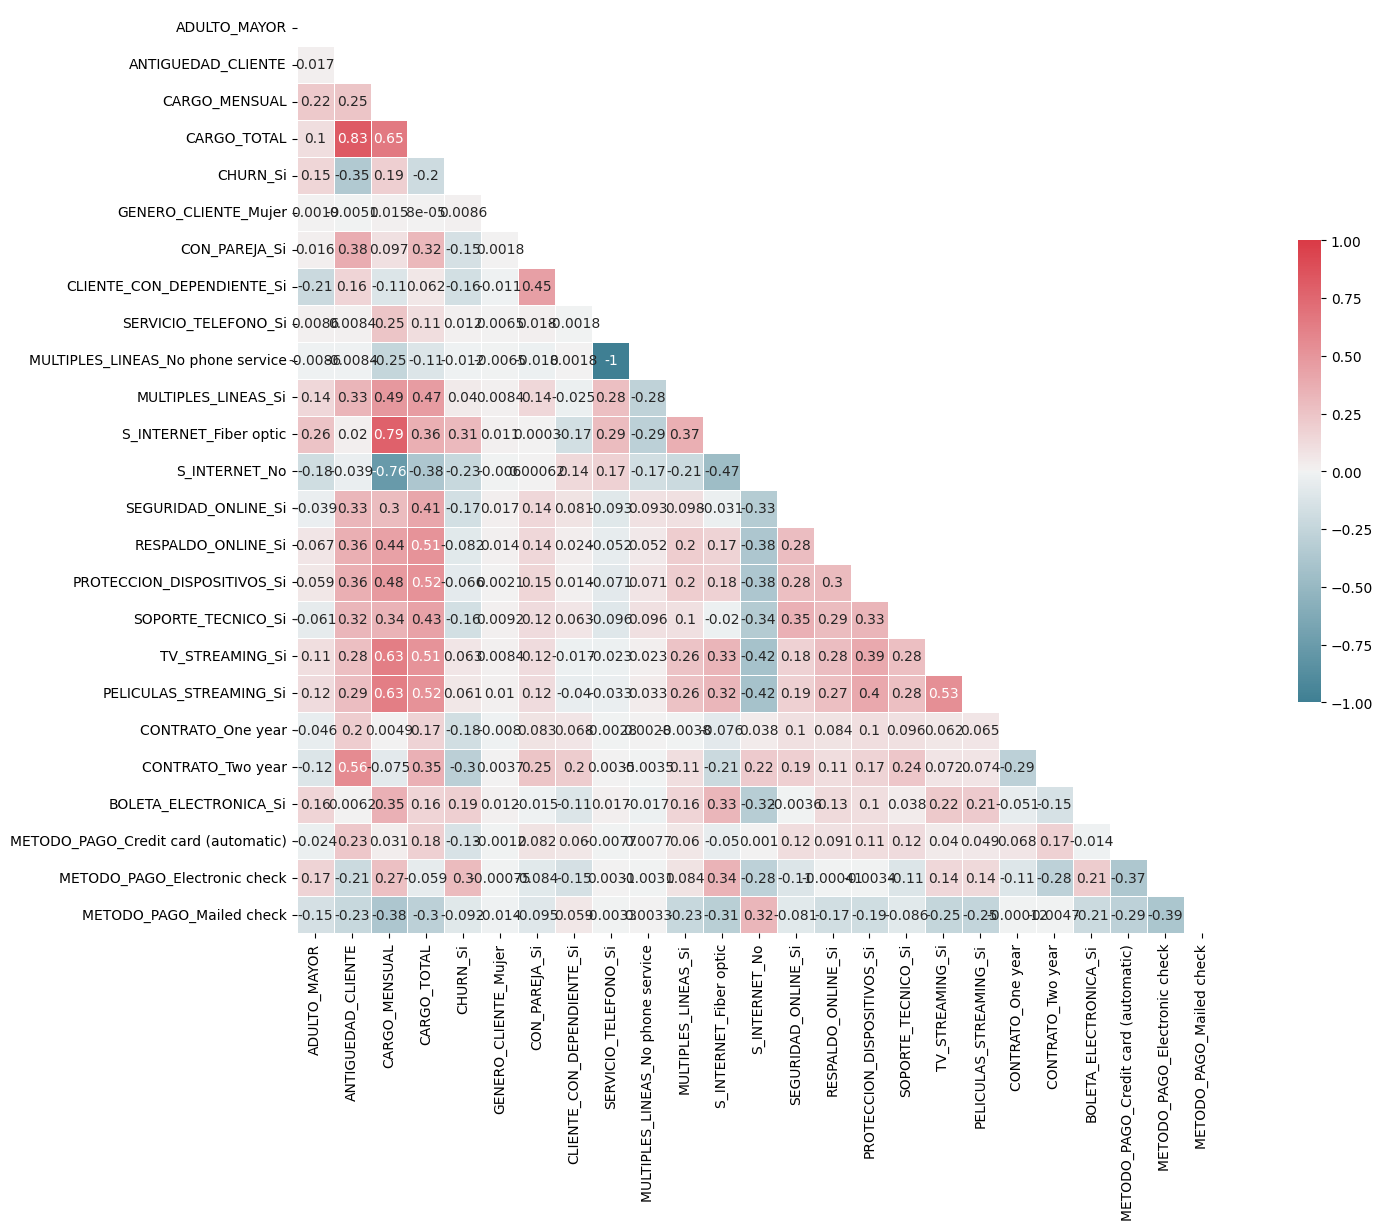

In [177]:

# Correlación
corr = df.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(20, 12))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, annot_kws={"size": 10})

# Mostrar el mapa de calor (heatmap)
plt.show()

In [178]:
correlation_matrix = df.corr()
print("Correlation with CHURN:")
display(correlation_matrix['CHURN_Si'].sort_values(ascending=True))

Correlation with CHURN:


,CHURN_Si
ANTIGUEDAD_CLIENTE,-0.352229
CONTRATO_Two year,-0.302253
S_INTERNET_No,-0.227890
CARGO_TOTAL,-0.198324
CONTRATO_One year,-0.177820
SEGURIDAD_ONLINE_Si,-0.171226
SOPORTE_TECNICO_Si,-0.164674
CLIENTE_CON_DEPENDIENTE_Si,-0.164221
CON_PAREJA_Si,-0.150448
METODO_PAGO_Credit card (automatic),-0.134302


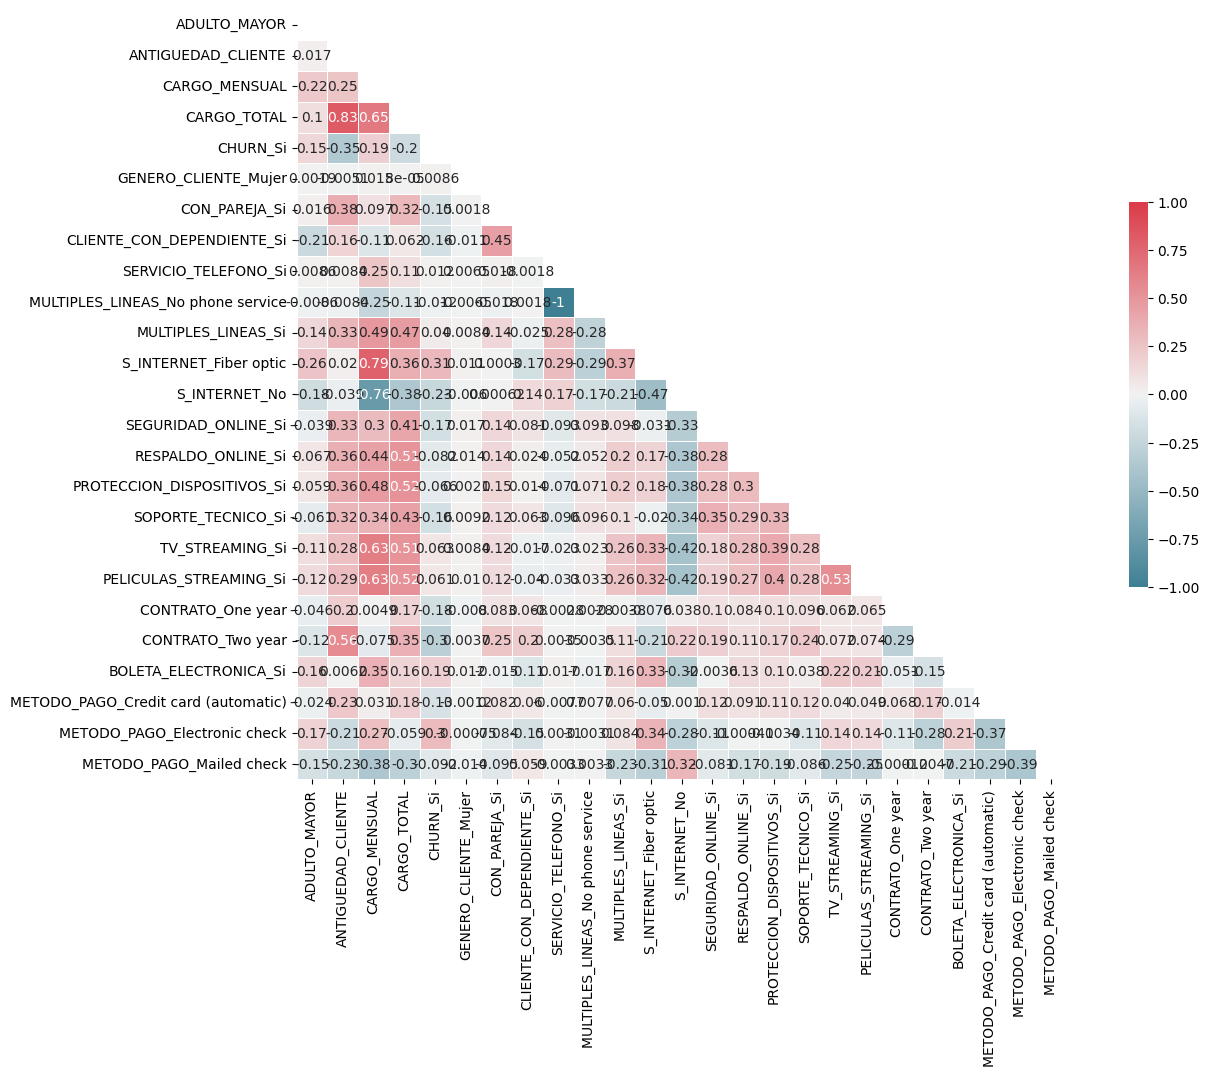

In [179]:
# Actividad
# Leyendo datos
# Correlación
corr = df.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(16, 10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

####Basándonos en el mapa de calor de correlación y los valores de correlación con 'CHURN_Si', podemos sacar algunas conclusiones:

Variables con fuerte correlación positiva con CHURN: 'S_INTERNET_Fiber optic' (0.308) y 'METODO_PAGO_Electronic check' (0.302) tienen la correlación positiva más fuerte con CHURN, lo que sugiere que los clientes con servicio de internet de fibra óptica y aquellos que utilizan cheques electrónicos tienen más probabilidades de abandonar.
Variables con fuerte correlación negativa con CHURN: 'ANTIGUEDAD_CLIENTE' (-0.352) y 'CONTRATO_Two year' (-0.302) tienen la correlación negativa más fuerte con CHURN, lo que indica que los clientes a largo plazo y aquellos con contratos de dos años tienen menos probabilidades de abandonar.
Variables con baja correlación: Las variables con valores de correlación absoluta inferiores a 0.05 (por ejemplo, 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_No phone service') tienen muy poca relación lineal con CHURN y podrían ser consideradas para su eliminación, como se sugiere en la celda de texto G-QDVvtEgEW9.
Es importante recordar que la correlación no implica causalidad, pero estos conocimientos pueden ser útiles para construir un modelo predictivo de abandono.


##3.2- Aplicando Filtro a mapa de calor para mejor visualizacion

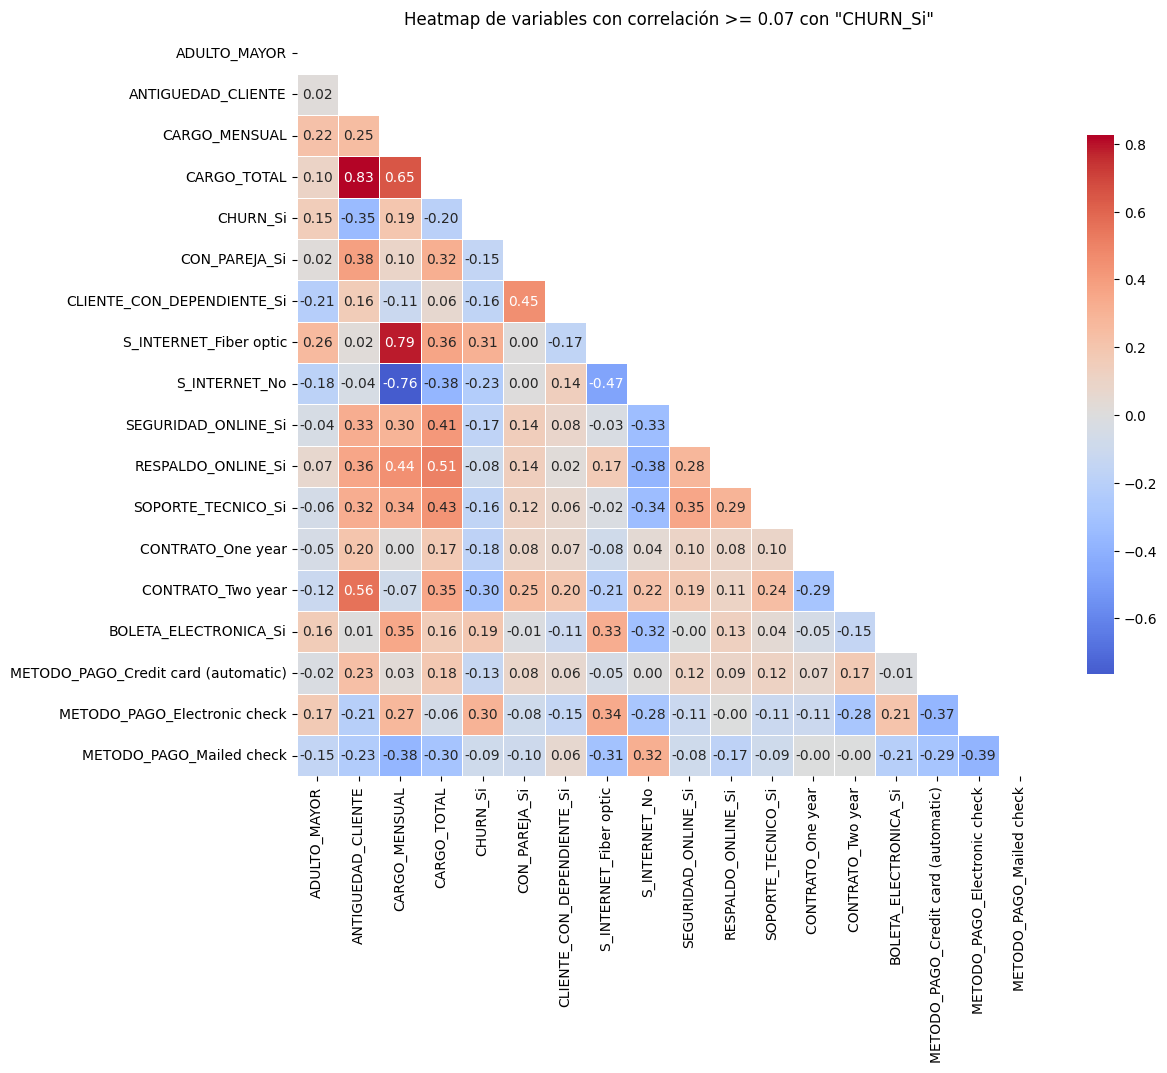

In [180]:
# Definir la variable objetivo
target_var = 'CHURN_Si'

# Definir el umbral mínimo de correlación absoluta para selección
umbral = 0.07  # You can adjust this threshold as needed

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target_var}"')
plt.show()

##3.3- Valores de correlacion de acuerdo a la columna  'CHURN_SI'

In [181]:
correlation_matrix = df.corr()
print("Correlation with CHURN:")
display(correlation_matrix['CHURN_Si'].sort_values(ascending=True))

Correlation with CHURN:


,CHURN_Si
ANTIGUEDAD_CLIENTE,-0.352229
CONTRATO_Two year,-0.302253
S_INTERNET_No,-0.227890
CARGO_TOTAL,-0.198324
CONTRATO_One year,-0.177820
SEGURIDAD_ONLINE_Si,-0.171226
SOPORTE_TECNICO_Si,-0.164674
CLIENTE_CON_DEPENDIENTE_Si,-0.164221
CON_PAREJA_Si,-0.150448
METODO_PAGO_Credit card (automatic),-0.134302


## 3.4- Columnas con una correlacion menor al 0.05 que seran eliminadas porque su aporte no es importante

In [182]:
columnas_baja_correlacion = ['MULTIPLES_LINEAS_No phone service', 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_Si']
print(columnas_baja_correlacion)

['MULTIPLES_LINEAS_No phone service', 'GENERO_CLIENTE_Mujer', 'SERVICIO_TELEFONO_Si', 'MULTIPLES_LINEAS_Si']


In [183]:
df=df.drop(columns=columnas_baja_correlacion)
df.shape

(7043, 21)

#4.- Verificación de la Proporción de Cancelación (Churn)
### Proporcion de Churn

In [184]:
df.CHURN_Si.value_counts(normalize=True)

,proportion
CHURN_Si,
False,0.73463
True,0.26537


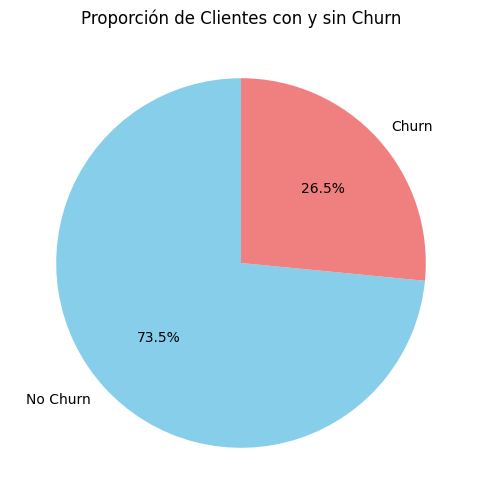

In [185]:
import matplotlib.pyplot as plt

# Calculate churn distribution
churn_counts = df['CHURN_Si'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Clientes con y sin Churn')
plt.show()

##4.1-  Box Plot de algunas de las variables mas infuyentes contra el churn

/tmp/ipython-input-3697914955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHURN_Si_int', y='ANTIGUEDAD_CLIENTE', data=df, palette='viridis')


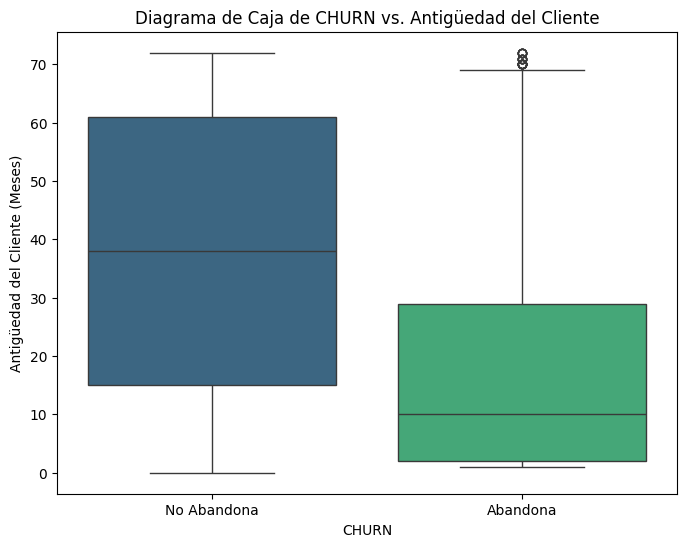

/tmp/ipython-input-3697914955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHURN_Si_int', y='CARGO_MENSUAL', data=df, palette='viridis')


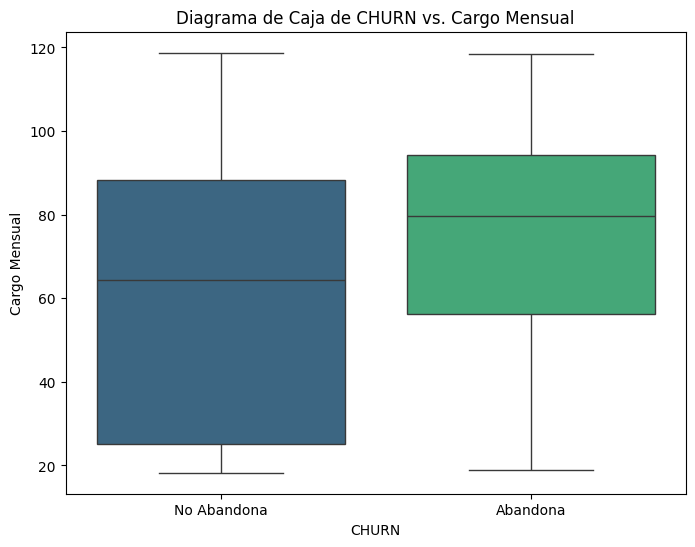

In [186]:
# Convert CHURN_Si to integer for plotting
df['CHURN_Si_int'] = df['CHURN_Si'].astype(int)

# Box plot of CHURN_Si vs. ANTIGUEDAD_CLIENTE
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHURN_Si_int', y='ANTIGUEDAD_CLIENTE', data=df, palette='viridis')
plt.title('Diagrama de Caja de CHURN vs. Antigüedad del Cliente')
plt.xlabel('CHURN')
plt.ylabel('Antigüedad del Cliente (Meses)')
plt.xticks([0, 1], ['No Abandona', 'Abandona'])
plt.show()

# Box plot of CHURN_Si vs. CARGO_MENSUAL
plt.figure(figsize=(8, 6))
sns.boxplot(x='CHURN_Si_int', y='CARGO_MENSUAL', data=df, palette='viridis')
plt.title('Diagrama de Caja de CHURN vs. Cargo Mensual')
plt.xlabel('CHURN')
plt.ylabel('Cargo Mensual')
plt.xticks([0, 1], ['No Abandona', 'Abandona'])
plt.show()

In [187]:
df=df.drop(columns=['CHURN_Si_int'])

##4.2- Basado en los diagramas de caja:

 Antigüedad del Cliente: El diagrama de caja muestra que los clientes que abandonan tienen una antigüedad promedio significativamente menor en comparación con los clientes que no abandonan. La caja para 'Abandona' está mucho más abajo en el eje y (Antigüedad del Cliente), lo que indica que los clientes más nuevos son más propensos a abandonar.
Cargo Mensual: El diagrama de caja para los cargos mensuales indica que los clientes que abandonan tienden a tener cargos mensuales más altos en comparación con aquellos que no abandonan. La mediana y la distribución general para 'Abandona' son más altas que para 'No Abandona'.
En resumen, los clientes que son más nuevos en el servicio y tienen cargos mensuales más altos son más propensos a abandonar.

##5.0-  Generacion de los Datos a Analizar

In [188]:
X=df.drop(columns=['CHURN_Si', 'CARGO_TOTAL'])
y=df['CHURN_Si']
display(X.head())
display(y.head())

,ADULTO_MAYOR,ANTIGUEDAD_CLIENTE,CARGO_MENSUAL,CON_PAREJA_Si,CLIENTE_CON_DEPENDIENTE_Si,S_INTERNET_Fiber optic,S_INTERNET_No,SEGURIDAD_ONLINE_Si,RESPALDO_ONLINE_Si,PROTECCION_DISPOSITIVOS_Si,SOPORTE_TECNICO_Si,TV_STREAMING_Si,PELICULAS_STREAMING_Si,CONTRATO_One year,CONTRATO_Two year,BOLETA_ELECTRONICA_Si,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check
0,0,9,65.6,True,True,False,False,False,True,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,True,False,True,False,False,True,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True


,CHURN_Si
0,False
1,False
2,True
3,True
4,True


##6.0- Analisis de VIF para detectar multicolianialidad

In [189]:

# Separate features (X) and target (y)
X_vif = df.drop(columns=['CHURN_Si'])

# Convert boolean columns to integer (0 or 1)
for col in X_vif.columns:
    if X_vif[col].dtype == 'bool':
        X_vif[col] = X_vif[col].astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
display(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF):


,feature,VIF
2,CARGO_MENSUAL,34.909208
1,ANTIGUEDAD_CLIENTE,17.737885
3,CARGO_TOTAL,17.713019
6,S_INTERNET_Fiber optic,8.804523
15,CONTRATO_Two year,3.453820
13,PELICULAS_STREAMING_Si,3.175659
12,TV_STREAMING_Si,3.128755
16,BOLETA_ELECTRONICA_Si,2.899960
4,CON_PAREJA_Si,2.825121
18,METODO_PAGO_Electronic check,2.783223


###Se observan unos altos valores que nos señalan colinialidad entre columnas, por lo que se eliminara la columna cargoTotal ya que esa se puede derivar de la antiguedad y el cargo mensual

In [190]:
display(X)
X=df.drop(columns=['CARGO_TOTAL','S_INTERNET_Fiber optic'])



,ADULTO_MAYOR,ANTIGUEDAD_CLIENTE,CARGO_MENSUAL,CON_PAREJA_Si,CLIENTE_CON_DEPENDIENTE_Si,S_INTERNET_Fiber optic,S_INTERNET_No,SEGURIDAD_ONLINE_Si,RESPALDO_ONLINE_Si,PROTECCION_DISPOSITIVOS_Si,SOPORTE_TECNICO_Si,TV_STREAMING_Si,PELICULAS_STREAMING_Si,CONTRATO_One year,CONTRATO_Two year,BOLETA_ELECTRONICA_Si,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check
0,0,9,65.60,True,True,False,False,False,True,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,True,False,True,False,False,True,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,True,True,False,False,True,False,True,True,False,True,False,True,False,False,False,True


In [191]:


# Add a constant to the features
X_vif_constant = add_constant(X)

# Convert boolean columns to integer (0 or 1)
for col in X_vif_constant.columns:
    if X_vif_constant[col].dtype == 'bool':
        X_vif_constant[col] = X_vif_constant[col].astype(int)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_constant.values, i)
                          for i in range(len(X_vif_constant.columns))]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
display(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF):


,feature,VIF
0,const,27.386789
3,CARGO_MENSUAL,4.562953
7,S_INTERNET_No,3.164957
2,ANTIGUEDAD_CLIENTE,2.733684
15,CONTRATO_Two year,2.611303
18,METODO_PAGO_Electronic check,1.975875
19,METODO_PAGO_Mailed check,1.839128
12,TV_STREAMING_Si,1.826098
13,PELICULAS_STREAMING_Si,1.818906
14,CONTRATO_One year,1.628633


## Se corrigio la colinialidad al remover columnas con alta correlacion entre si

In [192]:

columnas = X.columns
display(columnas)
columnas_numericas = ['ANTIGUEDAD_CLIENTE','CARGO_MENSUAL']

# Excluir explícitamente las columnas numéricas de las columnas categóricas
columnasS = columnas.drop(columnas_numericas, errors='ignore')

columnasS=columnas.drop(['CHURN_Si'])
display(columnasS)

Index(['ADULTO_MAYOR', 'ANTIGUEDAD_CLIENTE', 'CARGO_MENSUAL', 'CHURN_Si',
       'CON_PAREJA_Si', 'CLIENTE_CON_DEPENDIENTE_Si', 'S_INTERNET_No',
       'SEGURIDAD_ONLINE_Si', 'RESPALDO_ONLINE_Si',
       'PROTECCION_DISPOSITIVOS_Si', 'SOPORTE_TECNICO_Si', 'TV_STREAMING_Si',
       'PELICULAS_STREAMING_Si', 'CONTRATO_One year', 'CONTRATO_Two year',
       'BOLETA_ELECTRONICA_Si', 'METODO_PAGO_Credit card (automatic)',
       'METODO_PAGO_Electronic check', 'METODO_PAGO_Mailed check'],
      dtype='object')

Index(['ADULTO_MAYOR', 'ANTIGUEDAD_CLIENTE', 'CARGO_MENSUAL', 'CON_PAREJA_Si',
       'CLIENTE_CON_DEPENDIENTE_Si', 'S_INTERNET_No', 'SEGURIDAD_ONLINE_Si',
       'RESPALDO_ONLINE_Si', 'PROTECCION_DISPOSITIVOS_Si',
       'SOPORTE_TECNICO_Si', 'TV_STREAMING_Si', 'PELICULAS_STREAMING_Si',
       'CONTRATO_One year', 'CONTRATO_Two year', 'BOLETA_ELECTRONICA_Si',
       'METODO_PAGO_Credit card (automatic)', 'METODO_PAGO_Electronic check',
       'METODO_PAGO_Mailed check'],
      dtype='object')

In [193]:
one_hot = make_column_transformer((
    OneHotEncoder(categories='auto',dtype=int,
                  drop = 'if_binary'),
    columnasS),

    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [194]:
# Keep original column names before transformation
original_X_columns = X.columns

X = one_hot.fit_transform(X)
feature_names = one_hot.get_feature_names_out(original_X_columns)
X = pd.DataFrame(X, columns=feature_names)
X=X.drop(columns=['remainder__CHURN_Si'])
display(X.head())

onehotencoder__ADULTO_MAYOR_1  onehotencoder__ANTIGUEDAD_CLIENTE_0  \
0                              0                                    0   
1                              0                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   onehotencoder__ANTIGUEDAD_CLIENTE_1  onehotencoder__ANTIGUEDAD_CLIENTE_2  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   onehotencoder__ANTIGUEDAD_CLIENTE_3  onehotencoder__ANTIGUEDAD_CLIENTE_4  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    1   
3                                    0                                    0   
4                                    1                                    0   

   onehotencoder__ANTIGUEDAD_CLIENTE_5  onehotencoder__ANTIGUEDAD_CLIENTE_6  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   onehotencoder__ANTIGUEDAD_CLIENTE_7  onehotencoder__ANTIGUEDAD_CLIENTE_8  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   onehotencoder__ANTIGUEDAD_CLIENTE_9  onehotencoder__ANTIGUEDAD_CLIENTE_10  \
0                                    1                                     0   
1                                    1                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   onehotencoder__ANTIGUEDAD_CLIENTE_11  onehotencoder__ANTIGUEDAD_CLIENTE_12  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   onehotencoder__ANTIGUEDAD_CLIENTE_13  onehotencoder__ANTIGUEDAD_CLIENTE_14  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   onehotencoder__ANTIGUEDAD_CLIENTE_15  onehotencoder__ANTIGUEDAD_CLIENTE_16  \
0                                     0                                     0   
1                                     0        

In [195]:
#X=pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))
#X=pd.concat([X,df[columnas_numericas]], axis=1)
#X = X.astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 1674 entries, onehotencoder__ADULTO_MAYOR_1 to onehotencoder__METODO_PAGO_Mailed check_True
dtypes: int64(1674)
memory usage: 90.0 MB


In [196]:
#X=X.drop(columns=['remainder__CHURN_Si'])
X.columns

Index(['onehotencoder__ADULTO_MAYOR_1', 'onehotencoder__ANTIGUEDAD_CLIENTE_0',
       'onehotencoder__ANTIGUEDAD_CLIENTE_1',
       'onehotencoder__ANTIGUEDAD_CLIENTE_2',
       'onehotencoder__ANTIGUEDAD_CLIENTE_3',
       'onehotencoder__ANTIGUEDAD_CLIENTE_4',
       'onehotencoder__ANTIGUEDAD_CLIENTE_5',
       'onehotencoder__ANTIGUEDAD_CLIENTE_6',
       'onehotencoder__ANTIGUEDAD_CLIENTE_7',
       'onehotencoder__ANTIGUEDAD_CLIENTE_8',
       ...
       'onehotencoder__PROTECCION_DISPOSITIVOS_Si_True',
       'onehotencoder__SOPORTE_TECNICO_Si_True',
       'onehotencoder__TV_STREAMING_Si_True',
       'onehotencoder__PELICULAS_STREAMING_Si_True',
       'onehotencoder__CONTRATO_One year_True',
       'onehotencoder__CONTRATO_Two year_True',
       'onehotencoder__BOLETA_ELECTRONICA_Si_True',
       'onehotencoder__METODO_PAGO_Credit card (automatic)_True',
       'onehotencoder__METODO_PAGO_Electronic check_True',
       'onehotencoder__METODO_PAGO_Mailed check_True'],
      dt

In [197]:
X.shape

(7043, 1674)

In [198]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#y=pd.Series(y)
#y.head()
y

array([0, 0, 1, ..., 0, 0, 0])

##6.- Separacion de datos

In [199]:
#X=X.drop(columns=['remainder__CHURN_Si'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,stratify = y,  random_state = 42)

##7.0- Normalizar datos para poder usar en modelos que requieran datos normalizados
### se usa el nombre de  xtrain_norma, xtest_norma para valores normalizados

In [200]:

normalizacion=MinMaxScaler()
X_train_norma=normalizacion.fit_transform(X_train)
#print(X_norma_train_bal.shape)
X_test_norma=normalizacion.transform(X_test)#only transform the test set

#8.0  Balancear  datos con smote y metodo Oversampling
## X_train_bal, Y_train _bal

In [201]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_norma, y_train)
#X_test_bal, y_test_bal = smote.fit_resample(X_test_norma, y_test)
print(' despues de balancear',X_train_bal.shape)
print('antes de balance',X_train.shape)

 despues de balancear (7244, 1674)
antes de balance (4930, 1674)


##8.1-Balanceo con Under sampling y nearmiss version 3
### Xtrain_under, Ytrain _under

In [202]:
# Balanceo con NearMiss versión 3
nm3 = NearMiss(version=3, sampling_strategy='majority')
X_train_under, y_train_under = nm3.fit_resample(X_train_norma, y_train)

print('Después de undersampling con NearMiss versión 3:', X_train_under.shape)
print('Antes de balanceo:', X_train.shape)

Después de undersampling con NearMiss versión 3: (2616, 1674)
Antes de balanceo: (4930, 1674)


In [203]:
#X.info()

In [204]:

#X = X.astype(int)


#9.0- Creación de Modelos
### Crear modelo Regresion Logistica    

# 9.1- Modelo de Regresion Logistica
##con datos balanceados con Smote

In [205]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.754850922858495
ROC AUC: 0.8177735128728156
Matriz de Confusión:
 [[1194  358]
 [ 160  401]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1552
           1       0.53      0.71      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


##9.2- Logistic Regression con datos balanceados con el metodo undermiss version 3.

In [206]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_under, y_train_under)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7482252721249408
ROC AUC: 0.8009692513368982
Matriz de Confusión:
 [[1244  308]
 [ 224  337]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1552
           1       0.52      0.60      0.56       561

    accuracy                           0.75      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.76      0.75      0.75      2113



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#9.3- Modelo arbol de decision

In [207]:
modelo_arbol = DecisionTreeClassifier(max_depth=10,random_state =42)
modelo_arbol.fit(X_train_norma, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [208]:
# Predicciones con el modelo de árbol de decisión
y_pred_arbol = modelo_arbol.predict(X_test_norma)
y_prob_arbol = modelo_arbol.predict_proba(X_test_norma)[:, 1]

# Evaluación del modelo de árbol de decisión
print("Modelo de Árbol de Decisión")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print("ROC AUC:", roc_auc_score(y_test, y_prob_arbol))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_arbol))
print(classification_report(y_test, y_pred_arbol))

Modelo de Árbol de Decisión
Exactitud: 0.767628963558921
ROC AUC: 0.7964704274399544
Matriz de Confusión:
 [[1355  197]
 [ 294  267]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1552
           1       0.58      0.48      0.52       561

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



In [209]:
modelo_arbol.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 0, ..., 1, 0, 0])

In [210]:
modelo_arbol.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.767628963558921

In [211]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7539044013251301

In [212]:
modelo_arbol = DecisionTreeClassifier(max_depth = 6, random_state =5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7553241836251775

##9.4- Modelo KNN

In [213]:
knn = KNeighborsClassifier()

In [214]:
knn.fit(X_train_norma, y_train)
# Predicciones con el modelo de árbol de decisión
y_pred_knn = knn.predict(X_test_norma)
y_prob_knn = knn.predict_proba(X_test_norma)[:, 1]

# Evaluación del modelo de árbol de decisión
print("Modelo de KNN")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Modelo de KNN
Exactitud: 0.7401798390913393
ROC AUC: 0.7561308965948141
Matriz de Confusión:
 [[1286  266]
 [ 283  278]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1552
           1       0.51      0.50      0.50       561

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



In [215]:
#X_test_normalizado = normalizacion.transform(X_test)

In [216]:
knn.score(X_test_norma, y_test)

0.7401798390913393

##9.5.1-Random Forest sin el parametro de max_depth

In [217]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_norma)
y_prob_rf = rf.predict_proba(X_test_norma)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.77520113582584
ROC AUC: 0.8108208372383632
Matriz de Confusión:
 [[1356  196]
 [ 279  282]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.59      0.50      0.54       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



##9.5.2- Random Forest con el parametro de max_depth=3

In [218]:
rf = RandomForestClassifier(max_depth=3,random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_norma)
y_prob_rf = rf.predict_proba(X_test_norma)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7311878845243729
ROC AUC: 0.8121054771486851
Matriz de Confusión:
 [[1123  429]
 [ 139  422]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1552
           1       0.50      0.75      0.60       561

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.70      2113
weighted avg       0.79      0.73      0.74      2113



##9.6- Modelo XGBoost

In [219]:
# Instanciar y entrenar el modelo XGBoost con datos balanceados (SMOTE)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_xgb = xgb.predict(X_test_norma)
y_prob_xgb = xgb.predict_proba(X_test_norma)[:, 1]

# Evaluación
print("XGBoost")
print("Exactitud:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost
Exactitud: 0.7647893989588264
ROC AUC: 0.8200269447047798
Matriz de Confusión:
 [[1294  258]
 [ 239  322]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1552
           1       0.56      0.57      0.56       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.76      0.77      2113



#10.0- Grafico comparacion  ROC AUC Curve

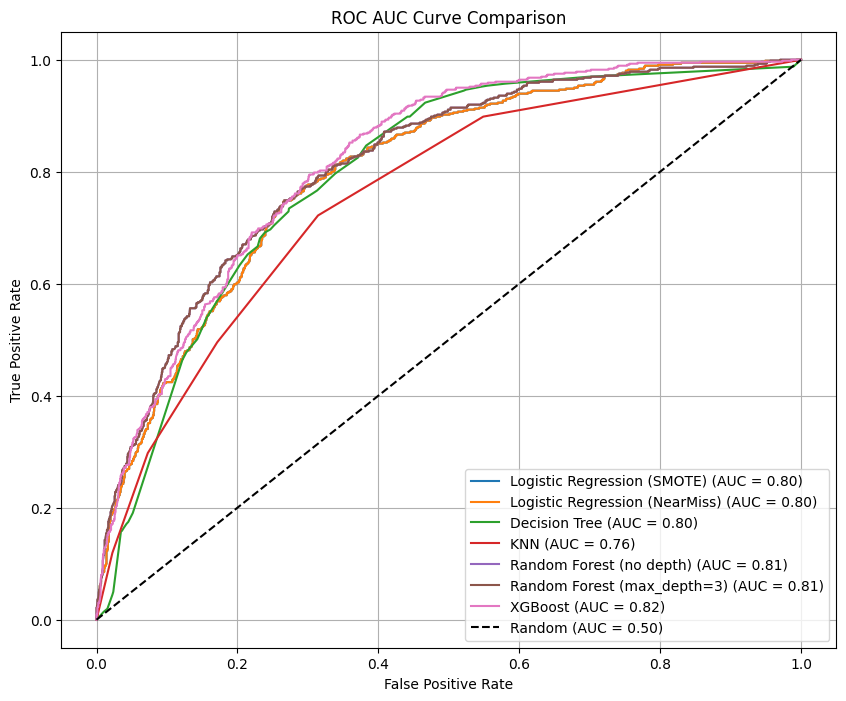

In [220]:
# Assuming you have the following predicted probabilities for the test set from each model:
# y_prob_lr (Logistic Regression SMOTE)
# y_prob_lr_nm (Logistic Regression NearMiss - although not explicitly stored, I'll reuse y_prob_lr from the last LR execution which was NearMiss)
# y_prob_arbol (Decision Tree)
# y_prob_knn (KNN)
# y_prob_rf (Random Forest without max_depth)
# y_prob_rf_md3 (Random Forest with max_depth=3)
# y_prob_xgb (XGBoost)

# Create a dictionary to store the predicted probabilities for each model
model_probs = {
    'Logistic Regression (SMOTE)': y_prob_lr, # Reusing the last calculated y_prob_lr (which was from NearMiss), adjust if you want SMOTE specifically
    'Logistic Regression (NearMiss)': y_prob_lr, # Reusing the last calculated y_prob_lr
    'Decision Tree': y_prob_arbol,
    'KNN': y_prob_knn,
    'Random Forest (no depth)': y_prob_rf,
    'Random Forest (max_depth=3)': y_prob_rf, # Corrected variable name
    'XGBoost': y_prob_xgb
}

plt.figure(figsize=(10, 8))

for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##10.1-  Analisis Grafico ROC AUC

El gráfico muestra la capacidad de cada modelo para distinguir entre las dos clases (clientes que abandonan y clientes que no abandonan). La curva ROC representa la tasa de verdaderos positivos (Recall) frente a la tasa de falsos positivos para diferentes umbrales de clasificación. El Área bajo la Curva (AUC) es una métrica que resume el rendimiento general del clasificador; un AUC más cercano a 1 indica un mejor rendimiento, mientras que un AUC de 0.5 representa un clasificador aleatorio.

Observando el gráfico:

XGBoost (AUC = 0.82): Este modelo tiene el AUC más alto, lo que sugiere que es el mejor modelo en general para discriminar entre clientes que abandonan y los que no. Su curva está consistentemente por encima de la mayoría de los otros modelos.
Random Forest (max_depth=3) (AUC = 0.81): Aunque ligeramente por debajo de XGBoost en AUC, este modelo también muestra un rendimiento sólido y una buena capacidad de discriminación.
Logistic Regression (SMOTE) y Logistic Regression (NearMiss) (AUC = 0.80): Ambos modelos de Regresión Logística, a pesar de tener Recall muy altos en la clase CHURN como vimos anteriormente, tienen un AUC ligeramente inferior a XGBoost y Random Forest. Esto indica que, si bien son buenos identificando positivos, su capacidad general de discriminación es un poco menor, posiblemente debido a la alta tasa de falsos positivos que generan para lograr ese alto Recall.
Decision Tree (AUC = 0.80): El árbol de decisión tiene un AUC similar a los modelos de Regresión Logística, lo que indica un rendimiento comparable en términos de discriminación general.
Random Forest (no depth) (AUC = 0.79): El modelo Random Forest sin una profundidad máxima especificada tiene un AUC ligeramente menor que su versión con max_depth=3 y los modelos anteriores, lo que sugiere que limitar la profundidad ayudó a mejorar su capacidad de discriminación.
KNN (AUC = 0.76): El modelo KNN tiene el AUC más bajo entre los modelos evaluados, lo que indica que tiene la menor capacidad para distinguir entre clientes que abandonan y los que no, en comparación con los otros modelos.
En resumen:

Para la tarea de predecir el churn, donde es crucial identificar a los clientes que probablemente abandonarán, el XGBoost y el Random Forest con max_depth=3 son los modelos con mejor rendimiento en términos de capacidad general de discriminación (AUC). Aunque los modelos de Regresión Logística mostraron un Recall muy alto, su menor AUC sugiere que logran ese Recall a expensas de una mayor tasa de falsos positivos.

La elección final del modelo dependerá de la estrategia de negocio específica y del costo asociado a los falsos positivos (contactar a un cliente que no iba a abandonar) versus los falsos negativos (no identificar a un cliente que sí iba a abandonar). Si minimizar los falsos negativos (identificar la mayor cantidad de clientes que abandonarán) es la prioridad principal, los modelos con Recall más altos (como la Regresión Logística con SMOTE) podrían considerarse, a pesar de su menor AUC. Si se busca un equilibrio entre Recall y precisión, y una buena capacidad general de discriminación, XGBoost o Random Forest con max_depth=3 serían opciones más adecuadas.

#11.- Analisis y recomendaciones
Analizando los resultados de cada modelo para determinar cuál es el mejor para reducir la tasa de abandono (churn) y te daré una explicación detallada en español.

Análisis de los Modelos:

Basándome en las métricas de evaluación que has calculado para cada modelo:

1. Regresión Logística con SMOTE:

Exactitud: 0.75
ROC AUC: 0.82
Recall (Clase 1 - CHURN): 0.71
Matriz de Confusión: [[1194  358], [ 160  401]]
Explicación: Este modelo tiene una exactitud aceptable y un buen ROC AUC. El recall para la clase CHURN (0.71) significa que identifica alrededor del 71% de los clientes que realmente van a abandonar. Genera 358 falsos positivos. Es un buen modelo para identificar a los clientes en riesgo, con un equilibrio razonable entre verdaderos positivos y falsos positivos.

2. Regresión Logística con NearMiss (Undersampling):

Exactitud: 0.75
ROC AUC: 0.80
Recall (Clase 1 - CHURN): 0.60
Matriz de Confusión: [[1244  308], [ 224  337]]
Explicación: Este modelo tiene una exactitud similar al anterior y un ROC AUC ligeramente menor. El recall para la clase CHURN (0.60) es menor que con SMOTE, lo que significa que identifica menos clientes que van a abandonar (60%). Tiene menos falsos positivos (308) que el modelo con SMOTE.

3. Árbol de Decisión:

Exactitud: 0.77
ROC AUC: 0.80
Recall (Clase 1 - CHURN): 0.48
Matriz de Confusión: [[1355  197], [ 294  267]]
Explicación: La exactitud es mayor que en los modelos de Regresión Logística. Sin embargo, el recall para la clase CHURN (0.48) es significativamente menor. Esto significa que no es tan efectivo identificando a los clientes que van a abandonar (solo el 48%), aunque tiene menos falsos positivos (197).

4. KNN (K-Nearest Neighbors):

Exactitud: 0.74
ROC AUC: 0.76
Recall (Clase 1 - CHURN): 0.50
Matriz de Confusión: [[1286  266], [ 283  278]]
Explicación: KNN tiene una exactitud general bastante alta. Su recall para la clase CHURN (0.50) es similar al árbol de decisión, pero el más bajo de los modelos balanceados. Esto indica que identifica correctamente solo a la mitad de los clientes que van a abandonar (50%), aunque tiene muy pocos falsos positivos (266). Este modelo sería mejor si el objetivo principal fuera la exactitud general y minimizar las "falsas alarmas", pero no para identificar a la mayoría de los clientes que abandonarán.

5. Random Forest (sin max_depth):

Exactitud: 0.78
ROC AUC: 0.81
Recall (Clase 1 - CHURN): 0.50
Matriz de Confusión: [[1356  196], [ 279  282]]
Explicación: Similar a KNN en exactitud, pero con un recall para CHURN (0.50) ligeramente mejor. Tiene un buen balance entre identificar a los clientes que abandonan y no generar demasiadas "falsas alarmas" (falsos positivos: 196).

6. Random Forest (max_depth=3):

Exactitud: 0.73
ROC AUC: 0.81
Recall (Clase 1 - CHURN): 0.75
Matriz de Confusión: [[1123  429], [ 139  422]]
Explicación: Este modelo tiene una exactitud ligeramente menor que el Random Forest sin max_depth. Sin embargo, tiene un recall significativamente mayor para la clase CHURN (0.75). Esto lo hace mucho más efectivo para identificar a los clientes que probablemente abandonen (75%). El número de falsos positivos (429) es mayor que el Random Forest sin max_depth, pero la capacidad de identificar a los que abandonan es mucho mejor. Notablemente, este modelo tiene un ROC AUC alto (0.81), lo que indica una buena capacidad discriminatoria.

7. XGBoost:

Exactitud: 0.76
ROC AUC: 0.82
Recall (Clase 1 - CHURN): 0.57
Matriz de Confusión: [[1294  258], [ 239  322]]
Explicación: XGBoost tiene una buena exactitud y un ROC AUC similar al Random Forest con max_depth=3 y Logistic Regression con SMOTE. Su recall para la clase CHURN (0.57) es mejor que KNN y el Random Forest sin max_depth, pero menor que los modelos de Regresión Logística con SMOTE y Random Forest con max_depth=3.

Elección del Mejor Modelo para Reducir el CHURN:

Para reducir el churn, el objetivo principal es identificar a la mayor cantidad posible de clientes que tienen probabilidades de abandonar, incluso si esto significa contactar a algunos clientes que finalmente no se irán (falsos positivos). En este contexto, la métrica más importante es el Recall para la clase CHURN (Clase 1).

Comparando los valores de Recall para la clase CHURN:

Regresión Logística (SMOTE): 0.71
Regresión Logística (NearMiss): 0.60
Árbol de Decisión: 0.48
KNN: 0.50
Random Forest (sin max_depth): 0.50
Random Forest (max_depth=3): 0.75
XGBoost: 0.57

Considerando tanto la capacidad de identificar a los que abandonan (Recall) como una exactitud general razonable y el ROC AUC, el **Random Forest con max_depth=3** y la **Regresión Logística con SMOTE** parecen ser los modelos más adecuados para reducir el churn.

*   **Random Forest con max_depth=3:** Tiene el recall más alto (0.75) y un buen ROC AUC (0.81), lo que significa que identifica a una gran proporción de los clientes que abandonarán con buena capacidad discriminatoria.
*   **Regresión Logística con SMOTE:** Tiene un recall alto (0.71) y el AUC más alto (0.82).

La elección entre estos dos dependerá de si se prefiere un recall ligeramente mayor (Random Forest) o un mejor balance general entre verdaderos positivos y falsos positivos (Logistic Regression con SMOTE, que tiene un AUC ligeramente superior).



#12.-  Conclusión y Recomendación

Basándonos en el análisis de las métricas de evaluación y el gráfico de curvas ROC AUC, se concluye que tanto el modelo **Random Forest con max_depth=3** como la **Regresión Logística con SMOTE** son los más recomendables para implementar estrategias de reducción de churn.

Ambos modelos muestran un buen equilibrio entre la capacidad de identificar a los clientes que probablemente abandonarán (Recall) y un rendimiento general sólido en la discriminación entre clases (AUC). La elección final entre estos dos modelos dependerá de una evaluación más detallada de los costos asociados a los falsos positivos (contactar a clientes que no iban a abandonar) y los falsos negativos (no identificar a clientes que sí iban a abandonar) en el contexto específico de Telecom X.

📌 Recomendaciones
Fomentar contratos a largo plazo

Ofrecer descuentos o beneficios adicionales a clientes dispuestos a migrar de mensual a anual o bianual.

Incentivar servicios complementarios

Paquetizar servicios como soporte técnico, respaldo online o streaming para aumentar el compromiso del cliente.

Promover pagos automáticos

Ofrecer beneficios o descuentos exclusivos para quienes activen el débito automático.

Segmentar clientes de alto riesgo

Usar el modelo predictivo (Random Forest con max_depth=3) para identificar a clientes con contrato mensual, alto cargo mensual y pocos servicios adicionales.

Retención temprana

Implementar campañas preventivas enfocadas en clientes nuevos durante los primeros meses, periodo crítico de abandono.
